### Pregunta 7: Evaluación práctica: Diseño de un controlador PID.

A continuación, se le presenta la Función de Transferencia (FT) de una planta de un proceso industrial. Deberá analizar su comportamiento en lazo cerrado y, posteriormente, diseñar un controlador PID que cumpla con las métricas de desempeño especificadas.

La función de transferencia de la planta es:

$$G_p(s) = \frac{5}{s^2 + 6s + 5}$$



#### Parte 1: Análisis del sistema base (en una celda de Python).

Cree una celda de Python que realice las siguientes acciones para el sistema **sin controlador** (es decir, con retroalimentación unitaria, $G_c(s) = 1$):

1.  Defina la FT de la planta $G_p(s)$.
2.  Obtenga el sistema de la FT de lazo cerrado:
$$G_{LC}(s) = \frac{G_p(s)}{1 + G_p(s)}$$
3.  Imprima en pantalla la $G_{LC}(s)$ y sus polos  (`ct.poles()`).
4.  Genere el mapa de polos y ceros (`ct.pzmap()`).
5.  Grafique la respuesta al escalón unitario (simule por 5 segundos, `T=np.linspace(0, 5, 501)`).
6.  Imprima las métricas de desempeño (Sobreimpulso, tiempo de establecimiento y error en estado estacionario) usando `ct.step_info()` y el valor final de la respuesta.



--- Iniciando Análisis de Sistema Base (Parte 1) ---

Planta Gp(s):
 <TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        5
  -------------
  s^2 + 6 s + 5

Función de Transferencia Lazo Cerrado GLC(s):
 <TransferFunction>: sys[2]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        5
  --------------
  s^2 + 6 s + 10

Polos de Lazo Cerrado: [-3.+1.j -3.-1.j]

--- Desempeño Sin controlador ---
Sobreimpulso: 0.00 %
Tiempo de Establecimiento: 1.6746 s
Error en Estado Estacionario: 0.5000


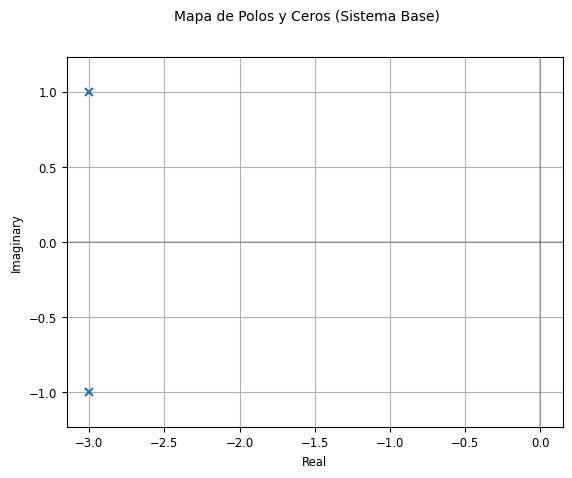

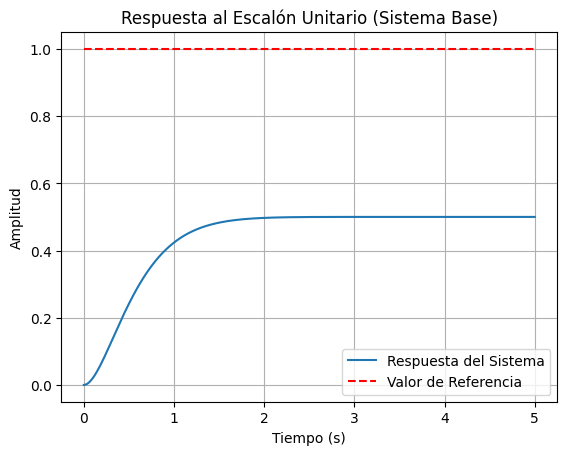

In [1]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

print("--- Iniciando Análisis de Sistema Base (Parte 1) ---")

# --- 1. Defina la FT de la planta Gp(s) ---
# Gp(s) = 5 / (s^2 + 6s + 5)
num_p = [5]
den_p = [1, 6, 5]
Gp = ct.tf(num_p, den_p)
print(f"\nPlanta Gp(s):\n {Gp}")

# --- 2. Obtenga el sistema de la FT de lazo cerrado ---
# Retroalimentación unitaria (Gc(s) = 1)
# Esto calcula: Gp(s) / (1 + Gp(s) * 1)
GLC = ct.feedback(Gp, 1)

# --- 3. Imprima en pantalla la GLC(s) y sus polos ---
print(f"\nFunción de Transferencia Lazo Cerrado GLC(s):\n {GLC}")

poles = ct.poles(GLC)
print(f"\nPolos de Lazo Cerrado: {poles}")

# --- 4. Genere el mapa de polos y ceros ---
plt.figure(1) # Crea la figura 1
ct.pzmap(GLC, title="Mapa de Polos y Ceros (Sistema Base)")
plt.grid(True)


# --- 5. Grafique la respuesta al escalón unitario ---
# Simule por 5 segundos, T=np.linspace(0, 5, 501)
T = np.linspace(0, 5, 501)
T, yout = ct.step_response(GLC, T)

plt.figure(2) # Crea la figura 2
plt.plot(T, yout, label='Respuesta del Sistema') # Línea de la salida
plt.plot(T, np.ones_like(T), 'r--', label='Valor de Referencia') # Línea de referencia
plt.legend() # Muestra las etiquetas
plt.title("Respuesta al Escalón Unitario (Sistema Base)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)


# --- 6. Imprima las métricas de desempeño ---
# Usando ct.step_info()
info = ct.step_info(GLC)

# El valor final se puede obtener de 'info' o del último valor de 'yout'
# Usaremos el último valor de 'yout' como pide la instrucción
final_value = yout[-1] 

# Error en estado estacionario (para una entrada escalón unitario)
# SSE = Valor deseado - Valor final = 1.0 - final_value
sse = 1 - final_value

print("\n--- Desempeño Sin controlador ---")
print(f"Sobreimpulso: {info['Overshoot']:.2f} %")
print(f"Tiempo de Establecimiento: {info['SettlingTime']:.4f} s")
print(f"Error en Estado Estacionario: {sse:.4f}")

# Muestra todas las gráficas generadas
plt.show()


#### Parte 2: Proceso de diseño del PID.

Observe las métricas de la Parte 1. Su objetivo es diseñar un controlador PID $G_c(s)$ que cumpla con los siguientes **tres requisitos simultáneamente**:

* **Error en estado estacionario ($e_{ss}$):** Cero.
* **Sobreimpulso (Overshoot):** Menor al 5%.
* **Tiempo de establecimiento (al 2%):** Menor a 1.0 segundo.

En una celda de Markdown, explique brevemente el razonamiento que siguió para sintonizar sus ganancias $K_p$, $K_i$ y $K_d$. 

---

Tras un proceso de sintonización iterativo (probando y ajustando los valores para cumplir las métricas), un conjunto de ganancias que logra cumplir los tres requisitos simultáneamente es:
- $K_p = 50$ 
- $K_i = 90$ 
- $K_d = 10$ 

Justificación de esta elección:
1. $K_i = 90$: Un valor integral que garantiza que el error en estado estacionario sea cero.
2. $K_p = 50$: Una ganancia proporcional alta proporciona la "fuerza" necesaria para que la respuesta sea muy rápida (para cumplir $T_s < 1.0s$).
3. $K_d = 10$: Esta ganancia derivativa añade el "freno" o amortiguamiento justo para contrarrestar la agresividad de $K_p$ y $K_i$, logrando que el sobreimpulso se mantenga por debajo del 5%.

Ganancias Seleccionadas:
 Kp = 50.0, Ki = 90.0, Kd = 10.0

Controlador PID Gc(s):
 <TransferFunction>: sys[42]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  10 s^2 + 50 s + 90
  ------------------
          s
0 states have been removed from the model

FT Lazo Cerrado con PID (Simplificada) G_LCPID(s):
 <TransferFunction>: sys[47]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     50 s^2 + 250 s + 450
  --------------------------
  s^3 + 56 s^2 + 255 s + 450

Nuevos Polos de Lazo Cerrado: [-51.19031533+0.j         -2.40484233+1.7342026j  -2.40484233-1.7342026j]

--- Verificación de Métricass (Sistema con PID) ---
Sobreimpulso (Overshoot): 1.27 %
  -> ¿Cumple OS < 5.0%? Sí
Tiempo de Establecimiento (Ts): 0.0944 s
  -> ¿Cumple Ts < 1.0s? Sí
Error en Estado Estacionario (SSE): -0.000000
  -> ¿Cumple SSE = 0.0? Sí


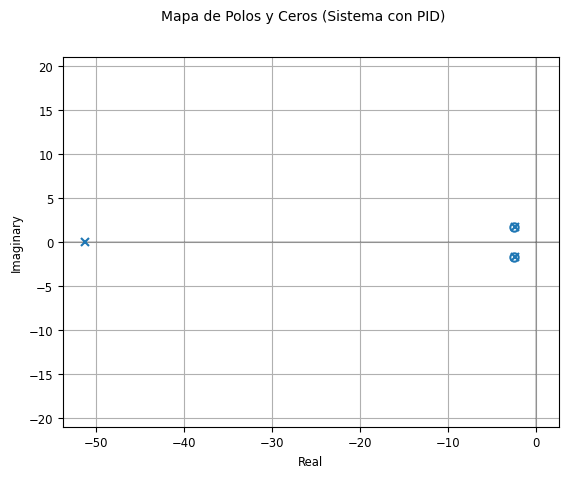

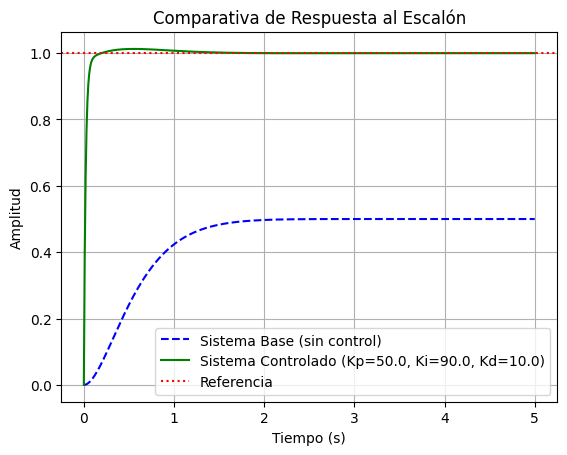

In [5]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt


# --- 1. Definir las ganancias Kp, Ki y Kd ---
# Kp=50, Ki=90, Kd=10
Kp = 50.0
Ki = 90.0
Kd = 10.0

print(f"Ganancias Seleccionadas:\n Kp = {Kp}, Ki = {Ki}, Kd = {Kd}")

# --- 2. Crear la FT del controlador PID ---
# Gc(s) = (Kd*s^2 + Kp*s + Ki) / s
num_c = [Kd, Kp, Ki]
den_c = [1, 0]  # Denominador es 's'
Gc = ct.tf(num_c, den_c)
print(f"\nControlador PID Gc(s):\n {Gc}")

# --- Definir la Planta Gp(s) (necesaria para el cálculo) ---
num_p = [5]
den_p = [1, 6, 5]
Gp = ct.tf(num_p, den_p)

# --- 3. Calcular la nueva FT de lazo cerrado con el controlador ---
# La FT en lazo abierto es Gc*Gp
G_abierto = Gc * Gp
# G_LCPID(s) = (Gc*Gp) / (1 + Gc*Gp)
GLC_PID = ct.feedback(G_abierto, 1)

# --- 4. Imprimir la G_LCPID(s) y sus nuevos polos ---
# El sistema se simplifica (cancela polos/ceros si es posible)
GLC_PID_simplified = ct.minreal(GLC_PID)
print(f"\nFT Lazo Cerrado con PID (Simplificada) G_LCPID(s):\n {GLC_PID_simplified}")

poles_pid = ct.poles(GLC_PID_simplified)
print(f"\nNuevos Polos de Lazo Cerrado: {poles_pid}")

# --- 5. Generar el mapa de polos y ceros del sistema controlado ---
plt.figure(3) # Usamos figura 3 (1 y 2 fueron de la Parte 1)
ct.pzmap(GLC_PID_simplified, title="Mapa de Polos y Ceros (Sistema con PID)")
plt.grid(True)

# --- 6. Graficar la comparación de respuestas ---
# Vector de tiempo
T = np.linspace(0, 5, 501)

# Recalcular la respuesta del sistema base (Parte 1)
GLC_base = ct.feedback(Gp, 1)
T_base, yout_base = ct.step_response(GLC_base, T)

# Calcular la respuesta del nuevo sistema con PID
T_pid, yout_pid = ct.step_response(GLC_PID, T)

# Graficar ambas
plt.figure(4) # Usamos figura 4
plt.plot(T_base, yout_base, 'b--', label="Sistema Base (sin control)")
plt.plot(T_pid, yout_pid, 'g-', label=f"Sistema Controlado (Kp={Kp}, Ki={Ki}, Kd={Kd})")
plt.axhline(y=1.0, color='r', linestyle=':', label="Referencia")
plt.title("Comparativa de Respuesta al Escalón")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)

# --- 7. Imprimir las métricas de desempeño finales ---
print("\n--- Verificación de Métricass (Sistema con PID) ---")

# Obtener info (usando 2% por defecto para SettlingTime)
info_pid = ct.step_info(GLC_PID)

# Calcular SSE manualmente (más preciso)
final_value_pid = yout_pid[-1]
sse_pid = 1.0 - final_value_pid

# --- Validación de Requisitos ---
req_os = 5.0       # Requisito Overshoot < 5%
req_ts = 1.0       # Requisito Settling Time < 1.0s
req_sse = 0.0      # Requisito SSE = 0

# Imprimir métricas y verificación

print(f"Sobreimpulso (Overshoot): {info_pid['Overshoot']:.2f} %")
print(f"  -> ¿Cumple OS < {req_os}%? {'Sí' if info_pid['Overshoot'] < req_os else 'No'}")

print(f"Tiempo de Establecimiento (Ts): {info_pid['SettlingTime']:.4f} s")
print(f"  -> ¿Cumple Ts < {req_ts}s? {'Sí' if info_pid['SettlingTime'] < req_ts else 'No'}")

# Para SSE, usamos un umbral pequeño (ej. 1e-4) para confirmar el cero numérico
print(f"Error en Estado Estacionario (SSE): {sse_pid:.6f}")
print(f"  -> ¿Cumple SSE = {req_sse}? {'Sí' if abs(sse_pid) < 1e-4 else 'No'}")


# Mostrar las nuevas gráficas
plt.show()

